# Simple Linear Regression

**To build a model that predicts the expected 'Healthy Life expectency', given the 'Happiness score'**

Import required libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the data

In [36]:
df = pd.read_excel("/content/data.xlsx")

In [37]:
df.head()

,Happiness_score,Healthy_life_expectancy
0,7.821,0.775
1,7.636,0.777
2,7.557,0.803
3,7.512,0.822
4,7.415,0.787


**Exploratory Data Analysis**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Happiness_score          146 non-null    float64
 1   Healthy_life_expectancy  146 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


In [39]:
df.describe()

,Happiness_score,Healthy_life_expectancy
count,146.000000,146.000000
mean,5.553575,0.586171
std,1.086843,0.176336
min,2.404000,0.000000
25%,4.888750,0.463250
50%,5.568500,0.621500
75%,6.305000,0.719750
max,7.821000,0.942000


In [40]:
df.columns

Index(['Happiness_score', 'Healthy_life_expectancy'], dtype='object')

In [41]:
df.duplicated().sum()

0

In [42]:
df.isnull().sum()

Happiness_score            0
Healthy_life_expectancy    0
dtype: int64

In [43]:
df.dtypes

Happiness_score            float64
Healthy_life_expectancy    float64
dtype: object

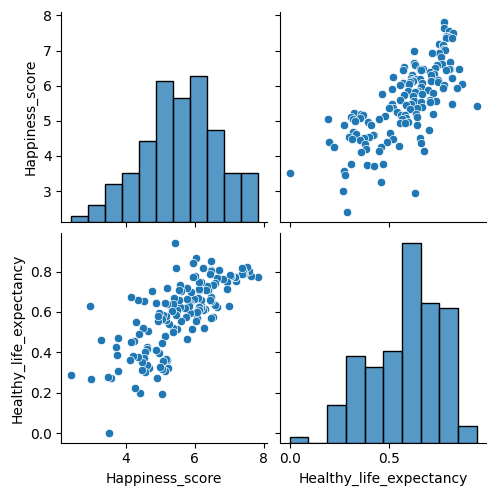

In [44]:
sns.pairplot(df)

<ipython-input-45-a7b7e4137651>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Healthy_life_expectancy'])


<Axes: xlabel='Healthy_life_expectancy', ylabel='Density'>

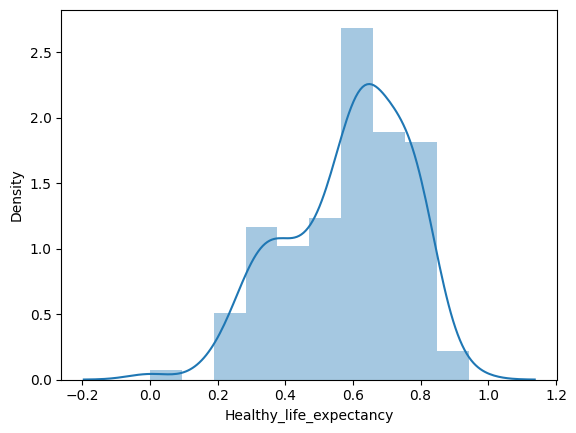

In [45]:
sns.distplot(df['Healthy_life_expectancy'])

In [46]:
df.corr()

,Happiness_score,Healthy_life_expectancy
Happiness_score,1.00000,0.74026
Healthy_life_expectancy,0.74026,1.00000


<Axes: >

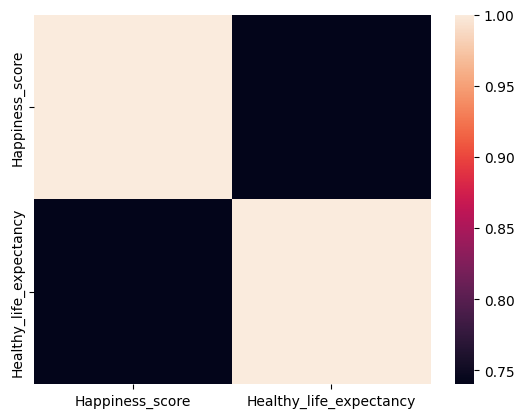

In [47]:
sns.heatmap(df.corr())

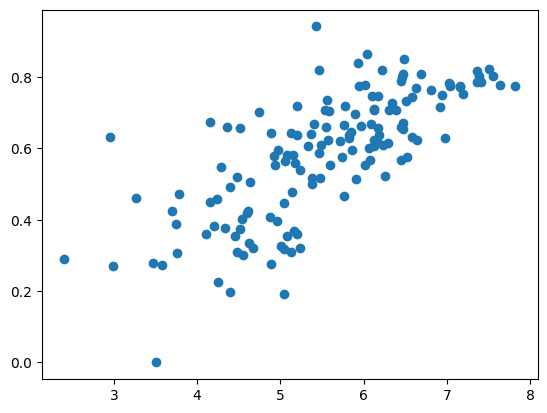

In [48]:
plt.scatter(df['Happiness_score'],df['Healthy_life_expectancy'])

Building Linear Regression model

In [49]:
x = df['Happiness_score']
y = df['Healthy_life_expectancy']

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
reg_model = LinearRegression()

In [54]:
X_train = X_train.reshape(-1, 1)
reg_model.fit(X_train, y_train)

LinearRegression()

**Evaluate results**

In [55]:
#intercept

print(reg_model.intercept_)

[-0.07244208]


In [56]:
# print coefficients

coeffs = pd.DataFrame(reg_model.coef_,['Happiness score'],columns=["coefficient"])

coeffs

,coefficient
Happiness score,0.11912


In [58]:
reg_model.coef_

array([[0.11912036]])

**Predictions from our model**

In [59]:
predictions = reg_model.predict(X_test)

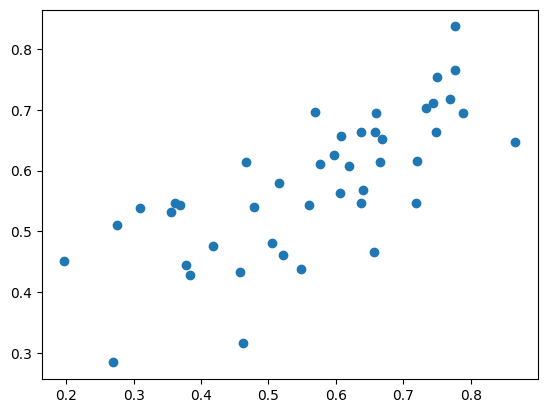

In [60]:
plt.scatter(y_test, predictions)

In [61]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Happiness_score': [df['Happiness_score'].min(), df['Happiness_score'].max()]})
X_new.head()


,Happiness_score
0,2.404
1,7.821


In [62]:
# make predictions for those x values and store them
preds = reg_model.predict(X_new)
preds

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[0.21392328],
       [0.85919828]])

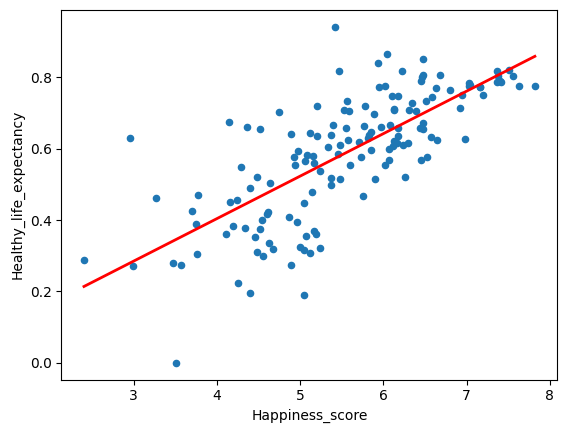

In [64]:
# first, plot the observed data
df.plot(kind='scatter', x='Happiness_score', y='Healthy_life_expectancy')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

**Histogram of residuals**

<ipython-input-65-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


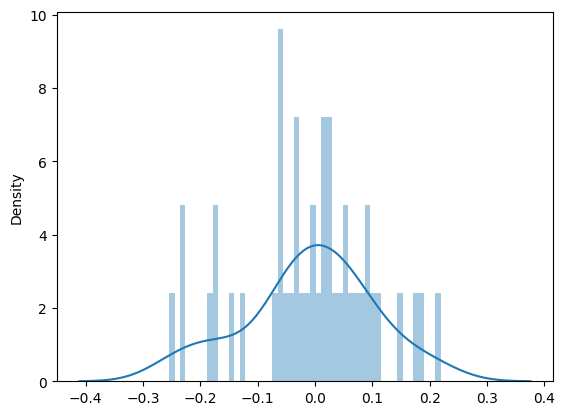

In [65]:
sns.distplot((y_test-predictions),bins=50);

**Regression Evaluation Metrics**

In [66]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Healthy_life_expectancy ~ Happiness_score', data=df).fit()
lm.conf_int()

,0,1
Intercept,-0.182502,0.020824
Happiness_score,0.102137,0.138072


In [67]:
lm.pvalues

Intercept          1.182139e-01
Happiness_score    1.321802e-26
dtype: float64

In this case, the p-value for Happiness score is less than 0.05, and so we conclude that there is a relationship between Happiness score and Healthy life expectency


**R-squared**

In [68]:
# to print the R-squared value for the model
lm.rsquared

0.5479855531649005

**Other metrics**

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.08482860805359888
MSE: 0.012166613518794571
RMSE: 0.11030237313310431


In [69]:
!jupyter nbconvert --execute --to html "/content/Linear_Regression_ML_Lab2.ipynb"


[NbConvertApp] WARNING | pattern '/content/Linear_Regression_ML_Lab2 (1).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans